In [37]:
#importing libraries

import torch, cv2
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torch.utils.data import TensorDataset
from numpy import pi
from torchvision.io import read_image


Image array conversion:
 tensor([[0.7490, 0.7490, 0.7451,  ..., 0.8157, 0.8196, 0.8196],
        [0.7490, 0.7490, 0.7490,  ..., 0.8157, 0.8157, 0.8196],
        [0.7490, 0.7490, 0.7490,  ..., 0.8196, 0.8157, 0.8157],
        ...,
        [0.6196, 0.6157, 0.6196,  ..., 0.7333, 0.7294, 0.7333],
        [0.6196, 0.6196, 0.6196,  ..., 0.7333, 0.7333, 0.7333],
        [0.6157, 0.6157, 0.6196,  ..., 0.7255, 0.7333, 0.7294]]) 
Image reshape:
 tensor([[0.7490, 0.7490],
        [0.7451, 0.7490],
        [0.7569, 0.7529],
        ...,
        [0.7294, 0.7294],
        [0.7294, 0.7255],
        [0.7333, 0.7294]]) 
Image resize:
 tensor([[0.7490, 0.7490, 0.7451,  ..., 0.7765, 0.7725, 0.7765],
        [0.6824, 0.6784, 0.6784,  ..., 0.7255, 0.7333, 0.7294]]) 
Image transpose:
 tensor([[0.7490, 0.7490, 0.7490,  ..., 0.6196, 0.6196, 0.6157],
        [0.7490, 0.7490, 0.7490,  ..., 0.6157, 0.6196, 0.6157],
        [0.7451, 0.7490, 0.7490,  ..., 0.6196, 0.6196, 0.6196],
        ...,
        [0.8157, 0.8

/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


(<Axes: >, <matplotlib.image.AxesImage at 0x7a0d9f833f10>)

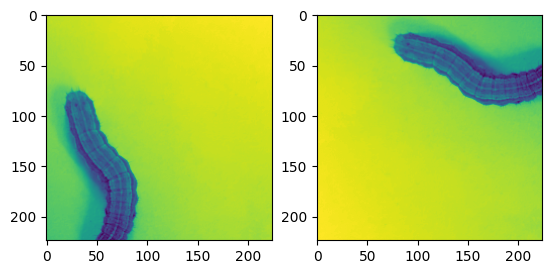

In [3]:
#Tensor operations

DATA_DIR = '/content/drive/MyDrive/Colab_Notebooks/Maize/Data/validation'

#Image to array conversion
transform = transforms.Compose([transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()])

#Processed data array loading partitioning
dataset = datasets.ImageFolder(DATA_DIR, transform=transform)
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)
images, labels = next(iter(dataloader))
image = images[2][0]
print("\nImage array conversion:\n", image, "\nImage reshape:\n", image.reshape(25088, 2), "\nImage resize:\n", image.resize(2, 25088), "\nImage transpose:\n", image.transpose(1, 0))
print(labels)
plt.subplot(1, 2, 1), plt.imshow(image)
plt.subplot(1, 2, 2), plt.imshow(np.transpose(image))


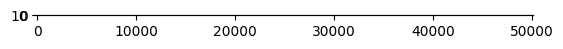

In [3]:
plt.imshow(images.reshape(15, 224*224))

In [5]:
#get the inverse cosine values
print("\nInverse cosine:\n", torch.acos(images), "\nHyperbolic cosine:\n", torch.acosh(images))


Inverse cosine:
 tensor([[[[1.2640, 1.2558, 1.2434,  ..., 1.2017, 1.2764, 1.3734],
          [1.2517, 1.2475, 1.2351,  ..., 1.1464, 1.2475, 1.3494],
          [1.2393, 1.2310, 1.2185,  ..., 1.1161, 1.2268, 1.3171],
          ...,
          [1.4212, 1.3734, 1.3534,  ..., 1.3292, 1.3090, 1.3009],
          [1.4805, 1.4568, 1.4489,  ..., 1.3090, 1.2846, 1.3049],
          [1.4962, 1.4805, 1.4687,  ..., 1.3413, 1.3009, 1.3009]],

         [[0.9516, 0.9419, 0.9322,  ..., 0.9224, 1.0129, 1.1335],
          [0.9224, 0.9273, 0.9175,  ..., 0.8824, 0.9896, 1.1029],
          [0.9075, 0.9075, 0.8925,  ..., 0.8671, 0.9802, 1.0675],
          ...,
          [1.2805, 1.2017, 1.1636,  ..., 1.0036, 0.9849, 0.9755],
          [1.3574, 1.3090, 1.2764,  ..., 0.9707, 0.9468, 0.9755],
          [1.3774, 1.3413, 1.3049,  ..., 0.9990, 0.9516, 0.9564]],

         [[1.0585, 1.0404, 1.0313,  ..., 1.5080, 1.5041, 1.5001],
          [1.0129, 1.0083, 0.9990,  ..., 1.4647, 1.4884, 1.4884],
          [0.9849, 0.980

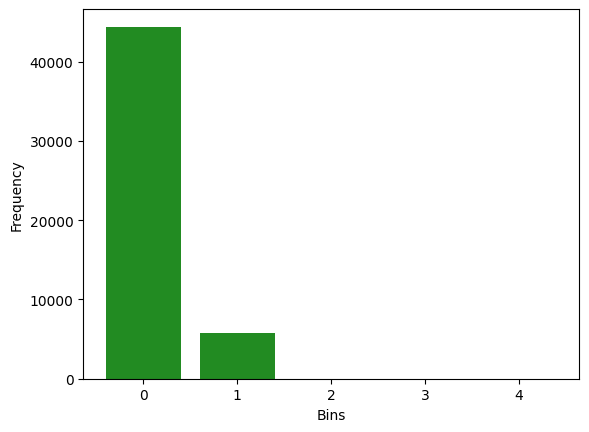

In [7]:
# Calculation of histogram of origin tensor
hist = torch.histc(image, bins=5, min=0, max=4)

# Visualization of histogram
bins = 5
x = range(bins)
plt.bar(x, hist, align='center', color=['forestgreen'])

#passing origin tensor's range as horizontal
plt.xlabel('Bins')

#passing histogram as vertical
plt.ylabel('Frequency')

plt.show()

In [8]:
# computing cosine similarity
sim = torch.nn.CosineSimilarity(dim=0)
output = sim(image, image.transpose(1, 0))

# display the output tensor
print("\n Cosine Similarity: \n", sim)

# defining Pair-wise distance
dist = torch.nn.PairwiseDistance(p=2)

# computing pairwise distance
result = dist(image, image.transpose(1, 0))

# displaying result
print("\n Pairwise Distance: \n", result)


 Cosine Similarity: 
 CosineSimilarity()

 Pairwise Distance: 
 tensor([4.6373, 4.6795, 4.7358, 4.6878, 4.6688, 4.7671, 4.6803, 4.6526, 4.4645,
        4.4267, 4.7074, 5.0174, 4.7057, 4.7497, 4.7270, 4.6884, 4.6611, 4.5756,
        4.7560, 4.7906, 4.8841, 4.8014, 4.8701, 4.9705, 5.1751, 5.1545, 4.9589,
        4.9677, 5.0475, 4.9941, 5.0194, 5.0765, 5.3040, 5.4322, 5.2364, 5.0133,
        4.8601, 4.7490, 4.5321, 4.5499, 4.4398, 4.1767, 4.6081, 4.6693, 4.5833,
        4.5877, 4.3664, 4.1182, 4.2485, 4.4981, 4.5125, 4.5578, 4.8459, 5.1316,
        4.9956, 4.7930, 4.6811, 4.6380, 4.5724, 4.4206, 4.0630, 3.7676, 3.6981,
        3.4859, 3.4327, 3.4338, 3.6239, 3.6705, 3.8255, 3.9056, 4.1368, 4.1423,
        4.0022, 3.8348, 3.7795, 4.0068, 3.9178, 3.8623, 3.9054, 4.0442, 3.9320,
        3.9115, 3.9478, 4.1941, 4.3619, 4.4847, 4.4273, 4.0687, 4.0400, 4.0315,
        3.9552, 3.9982, 4.1638, 3.9492, 3.8083, 3.8091, 3.8076, 3.8626, 3.9486,
        4.0440, 4.2641, 4.2497, 4.1300, 4.1693, 4.1764,

In [9]:
# computing element-wise entropy
entr = torch.special.entr(image)

# Displaying result
print("\n Computed Entropy: \n", entr)


 Computed Entropy: 
 tensor([[0.0534, 0.0534, 0.0422,  ..., 0.1173, 0.1846, 0.1816],
        [0.0931, 0.0534, 0.0233,  ..., 0.2192, 0.1439, 0.1307],
        [0.0966, 0.0497, 0.0194,  ..., 0.1630, 0.1373, 0.1567],
        ...,
        [0.3639, 0.3678, 0.3678,  ..., 0.2608, 0.3121, 0.3678],
        [0.3679, 0.3678, 0.3662,  ..., 0.2220, 0.2192, 0.2839],
        [0.3679, 0.3673, 0.3658,  ..., 0.1964, 0.2355, 0.2165]])


In [10]:
# computing error function
er = torch.special.erf(image)

# Displaying result
print("\nError function: \n", er)


Error function: 
 tensor([[0.8186, 0.8186, 0.8240,  ..., 0.7838, 0.7374, 0.7398],
        [0.7979, 0.8186, 0.8327,  ..., 0.7080, 0.7669, 0.7755],
        [0.7959, 0.8204, 0.8344,  ..., 0.7536, 0.7712, 0.7581],
        ...,
        [0.4508, 0.4017, 0.3901,  ..., 0.6655, 0.5945, 0.3901],
        [0.3979, 0.3901, 0.4322,  ..., 0.7054, 0.7080, 0.6369],
        [0.3979, 0.4170, 0.4359,  ..., 0.7278, 0.6925, 0.7105]])


In [12]:
# computing elements-wise angle in radians
radians = torch.angle(image)
print("\n Elements-wise angles in radians:\n ", radians)

degree = radians * 180/pi
print("\n Elements-wise angles in degree:\n ", degree)


 Elements-wise angles in radians:
  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

 Elements-wise angles in degree:
  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [13]:
# Compute the logistic sigmoid function
print(torch.special.expit(image))

tensor([[0.7201, 0.7201, 0.7225,  ..., 0.7057, 0.6883, 0.6891],
        [0.7114, 0.7201, 0.7264,  ..., 0.6781, 0.6991, 0.7024],
        [0.7105, 0.7209, 0.7272,  ..., 0.6942, 0.7008, 0.6958],
        ...,
        [0.6043, 0.5921, 0.5892,  ..., 0.6643, 0.6430, 0.5892],
        [0.5911, 0.5892, 0.5996,  ..., 0.6773, 0.6781, 0.6555],
        [0.5911, 0.5959, 0.6006,  ..., 0.6849, 0.6730, 0.6790]])


In [14]:
#Concatenation of tensors
concat = torch.cat([image, image.transpose(1, 0)])
print(concat)

tensor([[0.9451, 0.9451, 0.9569,  ..., 0.8745, 0.7922, 0.7961],
        [0.9020, 0.9451, 0.9765,  ..., 0.7451, 0.8431, 0.8588],
        [0.8980, 0.9490, 0.9804,  ..., 0.8196, 0.8510, 0.8275],
        ...,
        [0.8745, 0.7451, 0.8196,  ..., 0.6824, 0.7412, 0.7765],
        [0.7922, 0.8431, 0.8510,  ..., 0.5882, 0.7451, 0.7216],
        [0.7961, 0.8588, 0.8275,  ..., 0.3608, 0.6431, 0.7490]])


In [15]:
#max-min finding

print((image, torch.argmax(image)))
print((image, torch.argmin(image)))

(tensor([[0.9451, 0.9451, 0.9569,  ..., 0.8745, 0.7922, 0.7961],
        [0.9020, 0.9451, 0.9765,  ..., 0.7451, 0.8431, 0.8588],
        [0.8980, 0.9490, 0.9804,  ..., 0.8196, 0.8510, 0.8275],
        ...,
        [0.4235, 0.3725, 0.3608,  ..., 0.6824, 0.5882, 0.3608],
        [0.3686, 0.3608, 0.4039,  ..., 0.7412, 0.7451, 0.6431],
        [0.3686, 0.3882, 0.4078,  ..., 0.7765, 0.7216, 0.7490]]), tensor(25971))
(tensor([[0.9451, 0.9451, 0.9569,  ..., 0.8745, 0.7922, 0.7961],
        [0.9020, 0.9451, 0.9765,  ..., 0.7451, 0.8431, 0.8588],
        [0.8980, 0.9490, 0.9804,  ..., 0.8196, 0.8510, 0.8275],
        ...,
        [0.4235, 0.3725, 0.3608,  ..., 0.6824, 0.5882, 0.3608],
        [0.3686, 0.3608, 0.4039,  ..., 0.7412, 0.7451, 0.6431],
        [0.3686, 0.3882, 0.4078,  ..., 0.7765, 0.7216, 0.7490]]), tensor(31170))


In [18]:
#torch size matching
print(torch.eq(image, image.transpose(1, 0)))

tensor([[ True, False, False,  ..., False, False, False],
        [False,  True, False,  ..., False, False, False],
        [False, False,  True,  ..., False, False, False],
        ...,
        [False, False, False,  ...,  True, False, False],
        [False, False, False,  ..., False,  True, False],
        [False, False, False,  ..., False, False,  True]])


In [20]:
#softmax finding
softmax = F.softmax(image.float(), dim=0)
print("Softmax values are: ", softmax)

# Sum of all the softmax values
print("Sum of the softmax values: ", torch.sum(softmax))

Softmax values are:  tensor([[0.0065, 0.0066, 0.0067,  ..., 0.0054, 0.0050, 0.0050],
        [0.0062, 0.0066, 0.0068,  ..., 0.0048, 0.0052, 0.0053],
        [0.0062, 0.0066, 0.0068,  ..., 0.0051, 0.0053, 0.0051],
        ...,
        [0.0039, 0.0037, 0.0037,  ..., 0.0045, 0.0041, 0.0032],
        [0.0036, 0.0037, 0.0038,  ..., 0.0048, 0.0047, 0.0043],
        [0.0036, 0.0038, 0.0038,  ..., 0.0049, 0.0046, 0.0048]])
Sum of the softmax values:  tensor(224.)


In [21]:
#Cross Entropy Loss calculation
loss = torch.nn.CrossEntropyLoss()
# Passing values to the loss object.
cross_entropy_loss = loss(image.transpose(1, 0), image)

# Printing the value of the loss.
print("Cross Entropy Loss: ", cross_entropy_loss.item())

Cross Entropy Loss:  727.5272827148438


In [24]:
# define criterion to measure binary cross entropy
bce_loss = torch.nn.BCELoss()

# computing binary cross entropy
output = bce_loss(image.transpose(1, 0), image)

# display result
print('\n Binary Cross Entropy Loss: \n', output)


 Binary Cross Entropy Loss: 
 tensor(0.8168)


In [25]:
# measuring mean absolute error
MAE = torch.nn.L1Loss()
output_tensor = MAE(image.transpose(1, 0), image)
print("\n MAE loss: ", output_tensor)


 MAE loss:  tensor(0.2485)


In [26]:
# Mean and STD of columns
mean_col_wise = image.mean(axis = 0)
std_col_wise = image.std(axis = 0)

print(mean_col_wise)
print(std_col_wise)

# Mean and STD of rows
mean_row_wise = image.mean(axis = 1)
std_row_wise = image.std(axis = 1)

print(mean_row_wise)
print(std_row_wise)

tensor([0.5496, 0.5379, 0.5325, 0.5395, 0.5273, 0.5248, 0.5254, 0.5274, 0.5385,
        0.5367, 0.5175, 0.5059, 0.5140, 0.5138, 0.5136, 0.5165, 0.5139, 0.5139,
        0.5168, 0.5093, 0.5054, 0.5211, 0.5208, 0.5176, 0.5076, 0.4961, 0.5057,
        0.5033, 0.5027, 0.5100, 0.5109, 0.5062, 0.4908, 0.4900, 0.4998, 0.5078,
        0.5140, 0.5219, 0.5310, 0.5290, 0.5411, 0.5484, 0.5331, 0.5202, 0.5113,
        0.5105, 0.5318, 0.5388, 0.5363, 0.5303, 0.5396, 0.5446, 0.5269, 0.5164,
        0.5212, 0.5391, 0.5437, 0.5499, 0.5671, 0.5872, 0.6037, 0.6214, 0.6158,
        0.6314, 0.6341, 0.6339, 0.6226, 0.6128, 0.6140, 0.6081, 0.5859, 0.5924,
        0.5957, 0.5993, 0.6019, 0.6079, 0.6076, 0.6009, 0.6046, 0.5876, 0.5931,
        0.5941, 0.5832, 0.5725, 0.5659, 0.5655, 0.5762, 0.5748, 0.5885, 0.5898,
        0.5905, 0.5791, 0.5835, 0.5926, 0.5914, 0.5915, 0.5951, 0.5957, 0.5853,
        0.5875, 0.5901, 0.5956, 0.6021, 0.6114, 0.6131, 0.6236, 0.6290, 0.6138,
        0.6102, 0.6062, 0.6076, 0.6114, 

In [28]:
#inputing image
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/avatar.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# image to array conversion
transform = transforms.ToTensor()
imgTensor = transform(img)

# Computing mean
r, g, b = torch.mean(imgTensor, dim=[1, 2])

# Display Result
print("\n\nMean for Red channel: ", r)
print("Mean for Green channel: ", g)
print("Mean for Blue channel: ", b)



Mean for Red channel:  tensor(0.8465)
Mean for Green channel:  tensor(0.8108)
Mean for Blue channel:  tensor(0.8052)


In [4]:
# Defining  autoencoder architecture
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(8, 16,
                               kernel_size=3,
                               stride=2,
                               padding=1,
                               output_padding=1),
            torch.nn.ReLU(),
            torch.nn.ConvTranspose2d(16, 3,
                               kernel_size=3,
                               stride=2,
                               padding=1,
                               output_padding=1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# Initialize the autoencoder
model = Autoencoder()

# Define transform
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Load dataset
datasets.ImageFolder(DATA_DIR, transform=transform)
train_dataset = datasets.ImageFolder(root=DATA_DIR,
                                    transform=transform)
test_dataset = datasets.ImageFolder(root=DATA_DIR,
                                   transform=transform)
# Define the dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=128,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=128)

# Move the model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the autoencoder
num_epochs = 50
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.to(device)
        optimizer.zero_grad()
        output = model(img)
        loss = criterion(output, img)
        loss.backward()
        optimizer.step()
    if epoch % 5== 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab_Notebooks/conv_autoencoder.pth')

cuda
Epoch [1/50], Loss: 0.0519
Epoch [6/50], Loss: 0.0513
Epoch [11/50], Loss: 0.0508
Epoch [16/50], Loss: 0.0502
Epoch [21/50], Loss: 0.0494
Epoch [26/50], Loss: 0.0483
Epoch [31/50], Loss: 0.0471
Epoch [36/50], Loss: 0.0459
Epoch [41/50], Loss: 0.0447
Epoch [46/50], Loss: 0.0433


In [16]:
# adding unique padding
print("\n Before Pad Input Tensor:\n", images)
pad = torch.nn.ZeroPad2d((1, 2, 3, 4))
output = pad(images)

# displaying result
print("\n After Pad Input Tensor:\n", output)


 Before Pad Input Tensor:
 tensor([[[[0.3843, 0.4078, 0.4392,  ..., 0.5098, 0.4902, 0.4784],
          [0.3804, 0.3843, 0.4000,  ..., 0.5255, 0.4784, 0.4510],
          [0.3647, 0.3725, 0.3882,  ..., 0.5137, 0.4863, 0.4471],
          ...,
          [0.2000, 0.2314, 0.2667,  ..., 0.4824, 0.4549, 0.4275],
          [0.2196, 0.2667, 0.2941,  ..., 0.5255, 0.4706, 0.4510],
          [0.2706, 0.2941, 0.2627,  ..., 0.5490, 0.5176, 0.5020]],

         [[0.4980, 0.5216, 0.5294,  ..., 0.4000, 0.3843, 0.3686],
          [0.4902, 0.5020, 0.5137,  ..., 0.4118, 0.3686, 0.3412],
          [0.4745, 0.4863, 0.5020,  ..., 0.4000, 0.3725, 0.3373],
          ...,
          [0.2039, 0.2314, 0.2784,  ..., 0.3725, 0.3412, 0.3176],
          [0.2275, 0.2824, 0.3451,  ..., 0.4118, 0.3608, 0.3451],
          [0.2902, 0.3490, 0.3451,  ..., 0.4392, 0.4118, 0.4000]],

         [[0.2235, 0.2627, 0.3059,  ..., 0.3216, 0.3098, 0.2863],
          [0.2275, 0.2275, 0.2392,  ..., 0.3333, 0.2902, 0.2549],
          [0.2

In [26]:
m=image
indices=torch.tensor([0,1])
print("Indexed Matrix:\n",torch.index_select(m, 0, indices))

Indexed Matrix:
 tensor([[0.7490, 0.7490, 0.7451, 0.7490, 0.7569, 0.7529, 0.7529, 0.7529, 0.7529,
         0.7569, 0.7569, 0.7529, 0.7529, 0.7529, 0.7529, 0.7569, 0.7608, 0.7608,
         0.7647, 0.7608, 0.7608, 0.7608, 0.7647, 0.7647, 0.7647, 0.7647, 0.7608,
         0.7647, 0.7647, 0.7647, 0.7647, 0.7647, 0.7647, 0.7686, 0.7686, 0.7686,
         0.7686, 0.7686, 0.7725, 0.7686, 0.7725, 0.7725, 0.7725, 0.7765, 0.7725,
         0.7725, 0.7725, 0.7765, 0.7765, 0.7765, 0.7765, 0.7765, 0.7765, 0.7765,
         0.7765, 0.7765, 0.7765, 0.7804, 0.7804, 0.7804, 0.7804, 0.7804, 0.7804,
         0.7843, 0.7804, 0.7843, 0.7843, 0.7843, 0.7843, 0.7882, 0.7882, 0.7882,
         0.7922, 0.7882, 0.7882, 0.7882, 0.7882, 0.7922, 0.7922, 0.7922, 0.7961,
         0.7922, 0.7922, 0.7961, 0.7922, 0.7961, 0.7961, 0.7961, 0.7961, 0.7961,
         0.7922, 0.7922, 0.7922, 0.7961, 0.7922, 0.7922, 0.7922, 0.7922, 0.7922,
         0.7961, 0.7922, 0.7961, 0.7961, 0.7922, 0.7961, 0.7961, 0.7961, 0.8000,
         0.

In [27]:
#ReLu generation
Rel = torch.nn.ReLU(inplace=True)
Output = Rel(image)

# displayng result
print(" Output Tensor: ", Output)

 Output Tensor:  tensor([[0.7490, 0.7490, 0.7451,  ..., 0.8157, 0.8196, 0.8196],
        [0.7490, 0.7490, 0.7490,  ..., 0.8157, 0.8157, 0.8196],
        [0.7490, 0.7490, 0.7490,  ..., 0.8196, 0.8157, 0.8157],
        ...,
        [0.6196, 0.6157, 0.6196,  ..., 0.7333, 0.7294, 0.7333],
        [0.6196, 0.6196, 0.6196,  ..., 0.7333, 0.7333, 0.7333],
        [0.6157, 0.6157, 0.6196,  ..., 0.7255, 0.7333, 0.7294]])


In [30]:
# using maxpooling layer

# convert input image to torch tensor
Input = torchvision.transforms.ToTensor()(image)

# unsqueeze image to make 4D
Input = Input.unsqueeze(0)
print('Input Tensor :',Input.shape)

# define 2d Max pooling with square window
# of (kernel_size=4, stride=2 and padding=1)
pooling = torch.nn.MaxPool2d(kernel_size=(5,3),
                             stride=(3,2),
                             padding=(1,1),
                             dilation=1)
Output = pooling(Input)
print('Output Tensor :',Output.shape)
# squeeze image
Out_img = Output.squeeze(0)

# convert tensor to image
Out_img = torchvision.transforms.ToPILImage()(Out_img)
Out_img

Input Tensor : torch.Size([1, 1, 74, 74])
Output Tensor : torch.Size([1, 1, 24, 37])


In [36]:
# using dropout layer
drop = torch.nn.Dropout(.85)
Outputs = drop(Input)

# Display Tensor
print("\n Output Tensor: \n", Outputs)


 Output Tensor: 
 tensor([[[[0.0000, 0.0000, 0.0000,  ..., 5.4379, 0.0000, 0.0000],
          [0.0000, 4.9935, 0.0000,  ..., 0.0000, 0.0000, 5.4379],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 4.1569,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 4.8366, 0.0000],
          [0.0000, 4.1307, 0.0000,  ..., 4.8105, 4.8366, 4.8366]]]])


In [40]:
print("\n Input Tensor: \n", images)

# adding unique padding
pad = torch.nn.ConstantPad2d(1, 8)
output = pad(images)

# displaying result
print("\n After Pad Input Tensor:\n", output)


 Input Tensor: 
 tensor([[[[0.3843, 0.4078, 0.4392,  ..., 0.5098, 0.4902, 0.4784],
          [0.3804, 0.3843, 0.4000,  ..., 0.5255, 0.4784, 0.4510],
          [0.3647, 0.3725, 0.3882,  ..., 0.5137, 0.4863, 0.4471],
          ...,
          [0.2000, 0.2314, 0.2667,  ..., 0.4824, 0.4549, 0.4275],
          [0.2196, 0.2667, 0.2941,  ..., 0.5255, 0.4706, 0.4510],
          [0.2706, 0.2941, 0.2627,  ..., 0.5490, 0.5176, 0.5020]],

         [[0.4980, 0.5216, 0.5294,  ..., 0.4000, 0.3843, 0.3686],
          [0.4902, 0.5020, 0.5137,  ..., 0.4118, 0.3686, 0.3412],
          [0.4745, 0.4863, 0.5020,  ..., 0.4000, 0.3725, 0.3373],
          ...,
          [0.2039, 0.2314, 0.2784,  ..., 0.3725, 0.3412, 0.3176],
          [0.2275, 0.2824, 0.3451,  ..., 0.4118, 0.3608, 0.3451],
          [0.2902, 0.3490, 0.3451,  ..., 0.4392, 0.4118, 0.4000]],

         [[0.2235, 0.2627, 0.3059,  ..., 0.3216, 0.3098, 0.2863],
          [0.2275, 0.2275, 0.2392,  ..., 0.3333, 0.2902, 0.2549],
          [0.2471, 0.239